In [1]:
!pip install langchain_core langchain_openai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install python-dotenv

In [3]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv # used to store secret stuff like API keys or configuration values


In [4]:
from google.colab import userdata
load_dotenv()

class AgentState(TypedDict):
    messages: List[HumanMessage]

# Get the API key from environment variables
openai_api_key = userdata.get("OPENAI_API_KEY")

llm = ChatOpenAI(model="gpt-4o", openai_api_key=openai_api_key)

def process(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(f"\nAI: {response.content}")
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

user_input = input("Enter: ")
while user_input != "exit":
    agent.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter: ")

Enter: Who is Lin Dan

AI: Lin Dan is a retired Chinese badminton player who is widely regarded as one of the greatest badminton players of all time. Born on October 14, 1983, in Longyan, Fujian, China, he achieved numerous accolades throughout his career. Lin Dan is a two-time Olympic champion, having won gold medals in men's singles at the 2008 Beijing Olympics and the 2012 London Olympics. He is also a five-time world champion in men's singles and has won the prestigious All England Open six times.

Renowned for his exceptional skill, agility, and tactical intelligence on the court, Lin Dan earned the nickname "Super Dan." His rivalry with Malaysian player Lee Chong Wei is one of the most famous in badminton history. Lin Dan retired from professional badminton in July 2020, leaving behind a legacy as one of the sport's all-time greats.
Enter: exit


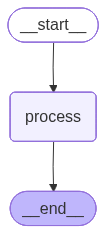

In [7]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))